In [ ]:
import tensorflow as tf
import numpy as np
import numpy

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/jeromeblanchet/conversational-question-answering-dataset-coqa")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: riyabensoni
Your Kaggle Key: ··········


100%|██████████| 10.2M/10.2M [00:00<00:00, 45.0MB/s]


In [ ]:
import pandas as pd
df = pd.read_json("/content/conversational-question-answering-dataset-coqa/coqa-train-v1.0.json")

In [ ]:
df.columns

Index(['version', 'data'], dtype='object')

In [ ]:
df.head()

,version,data
0,1,"{'source': 'wikipedia', 'id': '3zotghdk5ibi9ce..."
1,1,"{'source': 'cnn', 'id': '3wj1oxy92agboo5nlq4r7..."
2,1,"{'source': 'gutenberg', 'id': '3bdcf01ogxu7zdn..."
3,1,"{'source': 'cnn', 'id': '3ewijtffvo7wwchw6rtya..."
4,1,"{'source': 'gutenberg', 'id': '3urfvvm165iantk..."


In [ ]:
stories = []
questions = []
for data in df["data"]:
  stories.append(data["story"])
  for q in data["questions"]:
    questions.append(q["input_text"])

questions[:1], stories[:1]

(['When was the Vat formally opened?'],
 ['The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. \n\nThe Vatican Secret Archives were separa

In [ ]:
len(questions), len(stories)

(108647, 7199)

In [ ]:
# X = list(zip(stories, questions))
# X[:1]

In [ ]:
X_q = questions
X_s = stories
X_q[:1]

['When was the Vat formally opened?']

In [ ]:
X_s[:1]

['The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. \n\nThe Vatican Secret Archives were separated from the library at the beginning of 

In [ ]:
y_start = []
y_end = []
for data in df["data"]:
  for span in data["answers"]:
    y_start.append(span["span_start"]) #y.append((span["span_start"], span["span_end"]))
    y_end.append(span["span_end"])
y_start[:1], y_end[:1]

([151], [179])

In [ ]:
y_start_np = numpy.asarray(y_start)
y_end_np = numpy.asarray(y_end)

y_start_np[:2], y_end_np[:2]

(array([151, 454]), array([179, 494]))

In [ ]:
X_stories = []

for x in df["data"]:
  for z in x["questions"]:
    X_stories.append(x["story"])

X_stories[21]

'New York (CNN) -- More than 80 Michael Jackson collectibles -- including the late pop star\'s famous rhinestone-studded glove from a 1983 performance -- were auctioned off Saturday, reaping a total $2 million. \n\nProfits from the auction at the Hard Rock Cafe in New York\'s Times Square crushed pre-sale expectations of only $120,000 in sales. \n\nThe highly prized memorabilia, which included items spanning the many stages of Jackson\'s career, came from more than 30 fans, associates and family members, who contacted Julien\'s Auctions to sell their gifts and mementos of the singer. \n\nJackson\'s flashy glove was the big-ticket item of the night, fetching $420,000 from a buyer in Hong Kong, China. Jackson wore the glove at a 1983 performance during "Motown 25," an NBC special where he debuted his revolutionary moonwalk. \n\nFellow Motown star Walter "Clyde" Orange of the Commodores, who also performed in the special 26 years ago, said he asked for Jackson\'s autograph at the time, bu

In [ ]:
len(X_stories)

108647

In [ ]:
X_stories_np = np.asarray(X_stories)
len(X_stories_np)

108647

In [ ]:
X_q_np = np.asarray(X_q)
len(X_q_np)

108647

In [ ]:
# text_vectorizer = tf.keras.layers.TextVectorization()

In [ ]:
# # X = [X_q_tensor, X_stories_tensor]
# # X_reshaped = np.reshape(X, (-1,))
# # text_vectorizer.adapt(X_reshaped)
# text_vectorizer = tf.keras.layers.TextVectorization()

# data = tf.data.Dataset.from_tensor_slices((X_q_tensor, X_stories_tensor))
# labels = tf.data.Dataset.from_tensor_slices(y_tensor)
# dataset = tf.data.Dataset.zip((data, labels))
# dataset

In [ ]:
# dataset = dataset.batch(batch_size = 32)
# # dataset

In [ ]:
# X_non_tensor = [X_q, X_stories]
# y_non_tensor = y

In [ ]:
# words_in_vocab = text_vectorizer.get_vocabulary()

In [ ]:
# len(words_in_vocab)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# X_q = [str(q) for q in X_q]
# X_s = [str(s) for s in X_s]

# # Load the TensorFlow Hub module
hub_url = "https://tfhub.dev/google/elmo/3"
embed = hub.load(hub_url)

# # # Define your model
# # inputs = tf.keras.layers.Input(shape=(32, 1), dtype=tf.int64)  # Input shape correction
# # print(inputs.shape)
# # x = text_vectorizer(inputs)
# # x = hub.KerasLayer(embed, trainable=False)(x)  # Add the TensorFlow Hub layer
# # x = tf.keras.layers.Dense(64, activation='relu')(x) # Example additional dense layer
# # outputs = tf.keras.layers.Dense(len(words_in_vocab), activation='softmax')(x)
# # model = tf.keras.Model(inputs,outputs)  # Example output layer
# # # Replace 'words_in_vocab' with the actual number of words in your vocabulary

# # # Compile and train your model



from tensorflow.keras import layers

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3",
                                        input_shape = [], # input is blank as the module can take variable length english text
                                        dtype = tf.string,
                                        trainable = False,  #try the true wala part (someday).
                                        name = "USE")
# # inputs = layers.Input(shape=(),dtype=tf.string)
# # print(inputs.shape)
# # # x = text_vectorizer(inputs)

# # x = sentence_encoder_layer(inputs)

# # # x = layers.LSTM(64,return_sequences = True)(x)
# # x = layers.Dense(128, activation = "relu")(x)
# # outputs = layers.Dense(len(words_in_vocab),activation="softmax")(x)
# # model = tf.keras.Model(inputs,outputs)
# # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # model.fit(dataset, epochs=10, batch_size=32)



# # 1.
# # questions_inputs = tf.keras.layers.Input(shape = (), dtype = tf.string,  name = "question_model")
# # question_embedding_vectors = sentence_encoder_layer(questions_inputs)
# # question_outputs = tf.keras.layers.Dense(128, activation= "relu")(question_embedding_vectors)
# # question_model = tf.keras.Model(inputs = questions_inputs,
# #                                 outputs = question_outputs)


# # story_inputs = tf.keras.layers.Input(shape = (), dtype = tf.string,  name = "story_model")
# # story_embedding_vectors = sentence_encoder_layer(story_inputs)
# # story_outputs = tf.keras.layers.Dense(128, activation= "relu")(story_embedding_vectors)
# # story_model = tf.keras.Model(inputs = story_inputs,
# #                              outputs = story_outputs)

In [ ]:
# story_question_concat = tf.keras.layers.Concatenate(name = "token_char_concatenate")([question_model.output, story_model.output])
# output_layer = tf.keras.layers.Dense(2, activation = "softmax")(story_question_concat)

In [ ]:
# model_4 = tf.keras.Model(inputs = [question_model.input, story_model.input],
#                          outputs = output_layer,
#                          name = "model_4_hybrid")

In [ ]:
# model_4.summary()

In [ ]:
# from keras.utils import plot_model
# plot_model(model_4, show_shapes = True)

In [ ]:
# model_4.compile(loss = "mse",
#                 optimizer = tf.keras.optimizers.Adam(),
#                 metrics = ["accuracy"])

# model_4.fit(dataset,
#             epochs = 3)

In [ ]:
import pandas as pd
df_test = pd.read_json("/content/conversational-question-answering-dataset-coqa/coqa-dev-v1.0.json")

In [ ]:
stories_test = []
questions_test = []
for data in df_test["data"]:
  stories_test.append(data["story"])
  for q in data["questions"]:
    questions_test.append(q["input_text"])

len(questions_test),len(stories_test)

(7983, 500)

In [ ]:
X_q_test = questions_test
X_s_test = stories_test
len(X_q_test), len(X_s_test)

(7983, 500)

In [ ]:
y_test = []

for data in df_test["data"]:
  for span in data["answers"]:
    y_test.append((span["span_start"], span["span_end"])) #y.append((span["span_start"], span["span_end"]))
y_test[:5]

[(59, 93), (18, 80), (196, 215), (281, 315), (428, 490)]

In [ ]:
X_stories_test = []

for x in df_test["data"]:
  for z in x["questions"]:
    X_stories_test.append(x["story"])

len(X_stories_test),len(X_q_test)

(7983, 7983)

In [ ]:
X_q_tensor_test = tf.constant(X_q_test)

X_stories_tensor_test = tf.constant(X_stories_test)
X_stories_tensor_test.shape


TensorShape([7983])

In [ ]:
y_tensor_test = tf.constant(y_test)
y_tensor_test

<tf.Tensor: shape=(7983, 2), dtype=int32, numpy=
array([[ 59,  93],
       [ 18,  80],
       [196, 215],
       ...,
       [326, 358],
       [345, 359],
       [161, 207]], dtype=int32)>

In [ ]:
data_test = tf.data.Dataset.from_tensor_slices((X_q_tensor_test, X_stories_tensor_test))
labels_test = tf.data.Dataset.from_tensor_slices(y_tensor_test)
dataset_test = tf.data.Dataset.zip((data_test, labels_test))
dataset_test

<_ZipDataset element_spec=((TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None)), TensorSpec(shape=(2,), dtype=tf.int32, name=None))>

In [ ]:
dataset_test = dataset_test.batch(batch_size = 32)
dataset_test

<_BatchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 2), dtype=tf.int32, name=None))>

In [ ]:
dataset_test

<_BatchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 2), dtype=tf.int32, name=None))>

In [ ]:
# model_4.evaluate(dataset_test)

In [ ]:
context = ["Once there was a boy named nishant"]
question = ["What was the name of the boy?"]

my_list = [str(element) for element in context]
my_tensor = tf.constant(my_list)

print(my_tensor)
print(type(my_tensor))

my_list_1 = [str(element) for element in question]
my_tensor_1 = tf.constant(my_list_1)

print(my_tensor_1), print(type(my_tensor_1))



tf.Tensor([b'Once there was a boy named nishant'], shape=(1,), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor([b'What was the name of the boy?'], shape=(1,), dtype=string)
<class 'tensorflow.python.framework.ops.EagerTensor'>


(None, None)

In [ ]:
context_tensor = tf.constant(context)
question_tensor = tf.constant(question)

In [ ]:
context_tensor.dtype, question_tensor.dtype

(tf.string, tf.string)

In [ ]:
data_test = tf.data.Dataset.from_tensor_slices((question_tensor, context_tensor))
# labels_test = tf.data.Dataset.from_tensor_slices(y_tensor_test)

In [ ]:
# predictions = model_4.predict(question_tensor, context_tensor)

In [ ]:
# IDK if u can see the changes but this is where I'm stuckkkkkk
# I mean we only pass the passage and the question in the predict right???!!?
# We dont need to pass the span start and end right!!

In [ ]:
# Yeah I can see the changes!!
# No we dont need to pass the span start and end
# accuracy 98% but y is loss so high?!

In [ ]:
#Maybe it has something to do with the hidden units in the Dense layer!
# I'.... (it is not a good habit to leave sentences hanging!!) :((

In [ ]:
# 2 models

# 1 model -> inputs -> question and stories
# 2 model -> inputs -> question and stories
# 1 model -> labels -> span_start
# 2 model -> labels -> span_end

In [ ]:
# 2 inputs and 1 output

In [ ]:
# # model.compile(loss = tf.seq2seq.sequence_loss(),
# #               optimizer = tf.keras.optimizers.Adam(),
# #               metrics = ["accuracy"])

# # model.fit(dataset,
# #           epochs = 3)

#



# words_in_vocab = text_vectorizer.get_vocabulary()


tokenizer = tf.keras.preprocessing.text.Tokenizer()
story_token = tokenizer.fit_on_texts(X_stories)
question_token = tokenizer.fit_on_texts(X_q)
# tf.keras.preprocessing.text.Tokenizer(
#     num_words=76768,
#     filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
#     lower=True,
#     split=' '
# )

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_hub as hub



sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/elmo/3",
                                        trainable = False,  #try the true wala part (someday).
                                        name = "ELMO")


question_inputs = tf.keras.layers.Input(shape = (), dtype = tf.string)
story_inputs = tf.keras.layers.Input(shape = (), dtype = tf.string)

# story_token = tokenizer.fit_on_texts(X_stories)
# question_token = tokenizer.fit_on_texts(X_q)

question_embedding_vectors = sentence_encoder_layer(question_inputs)
story_embedding_vectors = sentence_encoder_layer(story_inputs)

start_logits = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([story_embedding_vectors, question_embedding_vectors], axis=-1))
end_logits = tf.keras.layers.Dense(1)(tf.keras.layers.concatenate([story_embedding_vectors, question_embedding_vectors], axis=-1))


# start_logits_output = start_logits(tf.concat([story_embedding_vectors, question_embedding_vectors], axis=-1))
# end_logits_output = end_logits(tf.concat([story_embedding_vectors, question_embedding_vectors], axis=-1))

model_base = tf.keras.Model(inputs=[story_inputs, question_inputs], outputs=[start_logits, end_logits])

model_base.compile(loss = "sparse_categorical_crossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

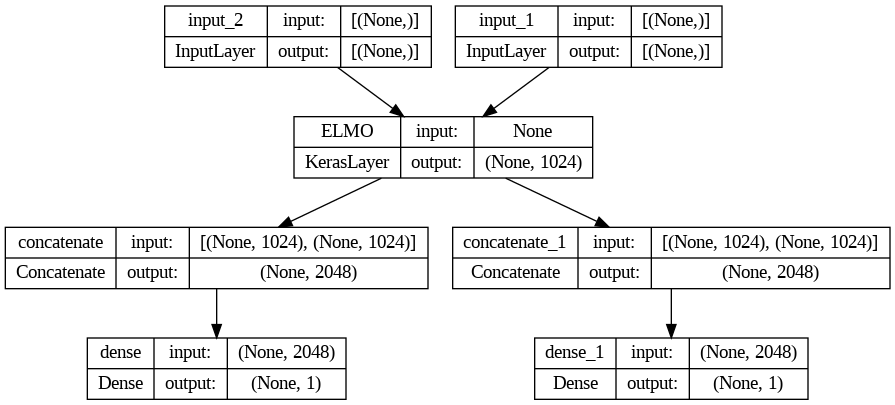

In [ ]:
from keras.utils import plot_model
plot_model(model_base, show_shapes = True)

In [ ]:
X_train = [X_stories_np, X_q_np]
y_train = [y_start_np, y_end_np]

X_train,y_train

([array(['The Vatican Apostolic Library (), more commonly called the Vatican Library or simply the Vat, is the library of the Holy See, located in Vatican City. Formally established in 1475, although it is much older, it is one of the oldest libraries in the world and contains one of the most significant collections of historical texts. It has 75,000 codices from throughout history, as well as 1.1 million printed books, which include some 8,500 incunabula. \n\nThe Vatican Library is a research library for history, law, philosophy, science and theology. The Vatican Library is open to anyone who can document their qualifications and research needs. Photocopies for private study of pages from books published between 1801 and 1990 can be requested in person or by mail. \n\nIn March 2014, the Vatican Library began an initial four-year project of digitising its collection of manuscripts, to be made available online. \n\nThe Vatican Secret Archives were separated from the library at the begin

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.8 MB/s eta 0:00:00


In [ ]:
from transformers import BertTokenizer, BertForQuestionAnswering
modelname = "deepset/bert-base-cased-squad2"

tokenizer = BertTokenizer.from_pretrained(modelname)
model = BertForQuestionAnswering.from_pretrained(modelname)

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from transformers import pipeline

qa = pipeline("question-answering", model = model, tokenizer=tokenizer)

In [ ]:
qa({
    'question': 'What is the name of the girl?',
    'context': "There is a girl named Riya"
})

{'score': 0.9902791380882263, 'start': 22, 'end': 25, 'answer': 'Riya'}